### 이미지 로데이터 파일에서 데이터 추출하기

In [3]:
# [ 1 ]. 파일 입출력 방식
# with open () as ~

filepath = '../datas/t10k-images.idx3-ubyte'

In [4]:
#파일 읽을 때 고려 사항: mode(br) : 바이트 읽기
with open(filepath, mode='br')as file:
    alldata = file.read()

In [8]:
print(type(alldata), len(alldata))

<class 'bytes'> 7840016


In [9]:
print(alldata[:10])


b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00"


In [13]:
#파일 읽을 때 고려 사항: mode(br) : 바이트 읽기
with open(filepath, mode='br')as file:
    magic_code = file.read(4)
    print(magic_code)
    data_length = file.read(4)
    print(data_length)
    row = file.read(4)
    print(row)
    col = file.read(4)
    print(col)

b'\x00\x00\x08\x03'
b"\x00\x00'\x10"
b'\x00\x00\x00\x1c'
b'\x00\x00\x00\x1c'


In [14]:
# 바이트 -> 알아볼 수 있는 문자로

row.hex()

'0000001c'

[2 ]  파이썬의 byte 데이터 변환 모듈 struct 활용하기 <hr>

In [19]:
## 모듈 로딩
import struct
import os

In [20]:
### 데이터 추출 및 저장 관련 변수
# 학습용 : train.csv
# 테스트용 : test.csv
# 위치 : ../datas/csv/

datadir = '../datas/csv/'
trainfile = datadir + 'train.csv'
testfile = datadir + 'test.csv'

In [27]:
# 사용자 정의 함수======================================
## 기능: raw data 파일을 읽어서 csv 파일로 저장
## 함수명: to_csv
## 매개변수: 파일이름, 데이터 수
## 반환 값: 파일 생성 여부(True / False)
#=======================================================

#디버깅 출력 제어 플래그 변수
DEBUG = False
def to_csv(filename, maxdata):
    #data
    #label, image file open
    labelfile = open('../datas/csv/'+filename+'-labels.idx1-ubyte', 'rb') #rb = read_binary
    imagefile = open('../datas/csv/'+filename+'-images.idx3-ubyte', 'rb') #rb = read_binary
    
    #tocsv
    csv_f = open('../datas/csv/'+filename+'.csv','w',encoding='utf-8')
    
    #read header info
    mag, lblcount = struct.unpack(">II", labelfile.read(8))# magic code + label quantity
    mag, imgcoumt = struct.unpack(">II", imagefile.read(8))#magic code +image quantity
    rows, cols = struct.unpack('>II', imagefile.read(8)) # rows, cols count
    pxls = rows * cols
    
    if DEBUG:
        print('lblcount{},imgcount{}'.format(lblcount,imgcoumt))
        print('rows{}, cols{}'.format(rows, cols))
        
    #read image data & convert to csv
    res = []
    for idx in range(lblcount):
        if idx>maxdata : break
        
        #number id data value reading
        #tuple-> single data return(value)
        
        lable = struct.unpack('B',labelfile.read(1))[0]
        if DEBUG: print('label->{}'.format(lable))
        
        #read img data
        bdata = imagefile.read(pxls)
        sdata = list(map(lambda n:str(n),bdata))#to str
        if DEBUG: print('sdata={}.'.format(sdata))
        
        #write in csv file
        csv_f.write(str(lable)+',')
        csv_f.write(','.join(sdata)+'\n')
        
    csv_f.close()
    labelfile.close()
    imagefile.close()
    
    
    #생성된 파일 존재 여부 확인 & 반환
    
    return  os.path.exists(datadir+f'{filename}.csv')

In [28]:
# 학습용 데이터파일 생성하기
to_csv('train',10000)


True

In [30]:
to_csv('t10k',1000)

True

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

[3] 이미지 데이터 로딩 후 시각화 <hr>

[3 - 1] 이미지 데이터 로딩: csv -> DF or Numpy ndarray

In [34]:
train = pd.DataFrame(pd.read_csv('../datas/csv/train.csv',header=None))
test = pd.DataFrame(pd.read_csv('../datas/csv/t10k.csv',header=None))

[3 - 2] 이미지 데이터 시각화

In [39]:
# 이미지 데이터와 라벨 분리
labels = train[0]
imgdata = train.iloc[:,1:]

labels.shape, imgdata.shape, imgdata[:3]

#plt.imshow(train.iloc[0,1:].values.reshape(28,28).astype(int),cmap='gray')

((10001,),
 (10001, 784),
    1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
 0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 
    779  780  781  782  783  784  
 0    0    0    0    0    0    0  
 1    0    0    0    0    0    0  
 2    0    0    0    0    0    0  
 
 [3 rows x 784 columns])

In [42]:
# 1d -> 2d 이미지데이터 변환

rawdata = imgdata.iloc[0].values
type(rawdata), rawdata.shape, rawdata.ndim

(numpy.ndarray, (784,), 1)

In [45]:
rawdata = rawdata.reshape(-1,28) #28개의 열로 만들어주라, 행은 알아서 정해
type(rawdata), rawdata.shape, rawdata.ndim #2d로 바뀜



(numpy.ndarray, (28, 28), 2)

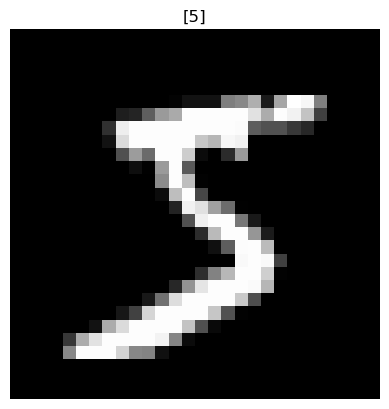

In [51]:
# 시각화
plt.title([labels[0]])
plt.imshow(rawdata,cmap='gray')
plt.axis('off')
plt.show()